<a href="https://colab.research.google.com/github/adhang/data-science-digital-skola/blob/main/99.%20Final%20Project/Telco_Customer_Churn_Prediction_(Portfolio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Contents**
1. Introduction
2. Importing Libraries
3. Dataset Overview
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Development & Evaluation
7. Conclusion
8. Explainable AI
9. Model Deployment
10. Reference and Further Reading

# 1. Introduction

**Dataset Information**
- This dataset contains customer information from a fictional telco company
- This company provides various services such as streaming, phone, and internet services
<br><br>

**Attribute Information**
- Identifier
  - `customerID` - ID number of the customer

- Target Variable
  - `Churn` - Churn status, whether the customer churned or not

- Demographic information
  - `gender` - Whether the customer is a male or a female
  - `SeniorCitizen` - Whether the customer is a senior citizen or not
  - `Partner` - Whether the customer has a partner or not
  - `Dependents` - Whether the customer has dependents or not

- Customer account information
  - `tenure` - Number of months the customer has used the service
  - `Contract` - The contract term of the customer
  - `PaperlessBilling` - Whether the customer has paperless billing or not
  - `PaymentMethod` - The customer’s payment method
  - `MonthlyCharges` - The amount charged to the customer monthly
  - `TotalCharges` - The total amount charged to the customer
  
- Services that each customer has signed up for
  - `PhoneService` - Whether the customer has a phone service or not
  - `MultipleLines` - Whether the customer has multiple lines or not
  - `InternetService` - Customer’s internet service provider
  - `OnlineSecurity` - Whether the customer has online security or not
  - `OnlineBackup` - Whether the customer has online backup or not
  - `DeviceProtection` - Whether the customer has device protection or not
  - `TechSupport` - Whether the customer has tech support or not
  - `StreamingTV` - Whether the customer has streaming TV or not
  - `StreamingMovies` - Whether the customer has streaming movies or not

**Note:** Since this dataset is using `CamelCase` format for the column names, for this project, I will convert it to `snake_case` format.
<br><br>

**Company Goals**<br>
Increasing profit! But how can we achieve it? Some of the way to increase profit are:
- Acquiring new customers as much as we can
- Retaining existing customers as much as we can
<br><br>

**Problems**
- Companies need to invest (expense costs) to get new customers
- When a customer leaves the service (churns), it indicates a loss of investment
- Cost, time, and effort need to be channelled to replace customers who have left the service
- Acquiring new customers is often more difficult and more expensive than retaining existing customers
- On Hardvard Business Review [page](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), they said: acquiring a new customer is anywhere from five to 25 times more expensive than retaining an existing one
<br><br>

**Objectives**
- Predict whether customers will continue to use the service or will leave the service
- Understanding the customer behaviors:
  - What keeps customers using the service
  - What makes customers leave the service

# 2. Importing Libraries

In [ ]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn

!pip install xgboost
!pip install lightgbm
!pip install catboost

!pip install inflection
!pip install dython
!pip install shap

In [1]:
# basic
import pandas as pd
import numpy as np

# association between attributes
from dython.nominal import associations

# CamelCase to snake_case format
import inflection

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
import shap

# 3. Dataset Overview

This is just a basic analysis, such as finding missing values, data types of each column, data variation, etc.
<br><br>

I do this analysis because it seems that this dataset contains no null values. But, actually, it has some null values (clue: on the total charge attribute).

## 3.1. Reading Dataset

In [2]:
path = 'https://raw.githubusercontent.com/adhang/datasets/main/telco-customer-churn.csv'

data = pd.read_csv(path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3.2. Duplicate Values

In [3]:
data.duplicated().sum()

0

This dataset doesn't have any duplicate values. It's a good sign.
<br><br>
Since the `customerID` is not essential, I will drop it.

In [4]:
data.drop('customerID', axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3.3. Renaming Column Names

Since this dataset is using `CamelCase` format for the column names, I will convert it to `snake_case` format. It's just a personal preference.

In [5]:
# renaming the column
column_list = list(data.columns)

for i, col in enumerate(column_list):
  column_list[i] = inflection.underscore(column_list[i]).replace(' ', '_')

data.columns = column_list
data.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3.4. Data Types

### 3.4.1. General Data Type

In [6]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

data_type_general = dict()

for col in data.columns:
  if col in column_numerical:
    data_type_general[col] = 'numerical'
  else:
    data_type_general[col] = 'categorical'

tmp = pd.Series(data_type_general)
data_type_general = pd.DataFrame(tmp).T.rename({0:'general data types'})
data_type_general

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical


### 3.4.2. Python Data Type

In [7]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


From this output, we can see that the `total_charges` attribute has `object` data type. So, I will change it to numeric.
<br><br>
Before converting to numeric data type, since I had already explored this dataset, let's check the `total_charges` attribute where the `tenure` attribute is `0`.

In [ ]:
data.loc[data['tenure'] == 0, ['tenure', 'total_charges', 'churn']]

,tenure,total_charges,churn
488,0,,No
753,0,,No
936,0,,No
1082,0,,No
1340,0,,No
3331,0,,No
3826,0,,No
4380,0,,No
5218,0,,No
6670,0,,No


If you look at the original dataset, if the `tenure` attribute has `0` value, it will have blank value on the `total_charges` attribute. It's reasonable, since they haven't used any services, so they don't have any charges.
<br><br>
But, it's not a null value.

In [ ]:
data['total_charges'].isna().sum()

0

In [ ]:
data.loc[488, 'total_charges']

' '

It's not null, but a blank space `' '`. So, I will use `errors = coerce` parameter to set the invalid parsing (blank space) as `NaN`.

In [8]:
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')
data['total_charges'].isna().sum()

11

After converting to numeric data type, our data contains 11 `NaN` values, since some of the value is not a numeric. Then, I will replace the null value with `0`.

In [9]:
data['total_charges'].fillna(0, inplace=True)
data['total_charges'].isna().sum()

0

In [10]:
data['total_charges'] = data['total_charges'].astype(float)
data.dtypes

gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

It works. So, I will re-create the dataframe to store the data type of each column.

In [11]:
data_type_python = pd.DataFrame(data.dtypes).T.rename({0:'python data types'})
data_type_python

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object


## 3.5. Total Data

In [12]:
data_count = pd.DataFrame(data.count()).T.rename({0:'total data'})
data_count

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043


## 3.6. Null Values

### 3.6.1. Total Null Values

In [13]:
data_null_total = pd.DataFrame(data.isna().sum()).T.rename({0:'total null'})
data_null_total

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.6.2. Null Values Percentage

In [14]:
data_null_percentage = pd.DataFrame(100*data.isna().sum()/data.shape[0]).T.rename({0:'percentage null'})
data_null_percentage

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3.7. Data Variation

I will find out the data variation:
- The range of data, for numerical data
- The category variations, for categorical data

### 3.7.1. Numerical Data

This dataset only contains 3 numerical data: `tenure`, `monthly_charges` and `total_charges`.

In [15]:
variation_numerical = dict()

for col in column_numerical:
  tmp = f'{data[col].min()} - {data[col].max()}'
  variation_numerical[col] = tmp

tmp = pd.Series(variation_numerical)
data_variation_numerical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_numerical

,tenure,monthly_charges,total_charges
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8


### 3.7.2. Categorical Data

In [16]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})
data_variation_categorical

,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


### 3.7.3. Overall Data Variation

In [17]:
data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","0, 1","No, Yes","No, Yes","No, Yes","No, No phone service, Yes","DSL, Fiber optic, No","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","No, No internet service, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [18]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
senior_citizen,-,"0, 1"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0 - 72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, No phone service, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, No internet service, Yes"
online_backup,-,"No, No internet service, Yes"


### 3.7.4. Redundant Values

Let's take a look at the `multiple_lines` attribute. It has a category of `No phone service`. It's a redundant category, because if the customer doesn't have phone service (`phone_service = No`), then they can't have multiple lines service, which requires phone service.
<br><br>
This also applies to the `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, and `streaming_movies` attributes. These services require internet service.
<br><br>
My solution is simply replace these categories to `No`. This solution is also used to avoid multicollinearity and reduce the dataset dimension (after one-hot encoding, I will cover it on the data preprocessing section)

In [19]:
# replace redundant values
data.replace({'No phone service':'No',
            'No internet service':'No'},
            inplace=True)

data['senior_citizen'].replace({0:'No',
                                1:'Yes'},
                                inplace=True)

In [20]:
variation_categorical = dict()

for col in column_categorical:
  tmp = data[col].unique().tolist()
  tmp.sort()
  variation_categorical[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_categorical)
data_variation_categorical = pd.DataFrame(tmp).T.rename({0:'data variation'})

data_variation = pd.concat([data_variation_numerical, data_variation_categorical], axis=1)
data_variation

,tenure,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
data variation,0 - 72,18.25 - 118.75,0.0 - 8684.8,"Female, Male","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check","No, Yes"


In [21]:
pd.concat([data_variation_numerical.rename({'data variation':'range'}), data_variation_categorical.rename({'data variation':'variation'})], axis=0).fillna('-').reindex(data.columns, axis=1).T

,range,variation
gender,-,"Female, Male"
senior_citizen,-,"No, Yes"
partner,-,"No, Yes"
dependents,-,"No, Yes"
tenure,0 - 72,-
phone_service,-,"No, Yes"
multiple_lines,-,"No, Yes"
internet_service,-,"DSL, Fiber optic, No"
online_security,-,"No, Yes"
online_backup,-,"No, Yes"


## 3.8. Summary of Dataset Info

In [22]:
data_info = pd.concat([data_type_general, data_type_python,
                       data_count, data_null_total,
                       data_null_percentage.round(2), data_variation],
                      axis=0)

data_info = data_info.reindex(data.columns, axis=1)
data_info

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
general data types,categorical,categorical,categorical,categorical,numerical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numerical,numerical,categorical
python data types,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,object
total data,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
total null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
percentage null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data variation,"Female, Male","No, Yes","No, Yes","No, Yes",0 - 72,"No, Yes","No, Yes","DSL, Fiber optic, No","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","No, Yes","Month-to-month, One year, Two year","No, Yes","Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check",18.25 - 118.75,0.0 - 8684.8,"No, Yes"


# 4. Exploratory Data Analysis

In [23]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

# only contains input features
column_categorical.remove('churn')

In [24]:
data_viz = data.copy()
data_viz.loc[:,'churn'] = data_viz.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

## 4.1. Visualization Function

In [ ]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))
  
  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')      
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

## 4.2. Target Distribution

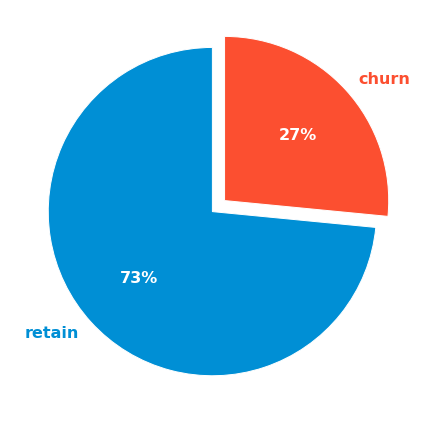

In [ ]:
pie_data = data_viz['churn'].value_counts(normalize=True).values * 100
pie_label = data_viz['churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'target-distribution.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

As we can see, 27% of customers leave the services. Technically speaking, this dataset is an imbalanced dataset.

## 4.3. Why Did It Happen?

There are so many factors, but not all attributes have a strong relationship with customer's churn status.

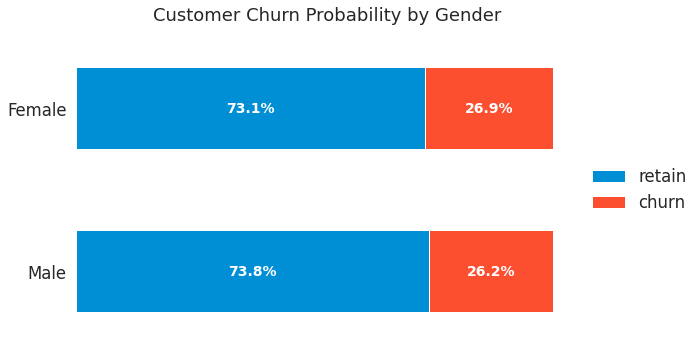

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='gender', y='churn', ax=ax, show=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'churn-probability-by-gender.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

Both males and females almost have the same probability to churn. We can say that customer’s gender has no relationship with their churn status.

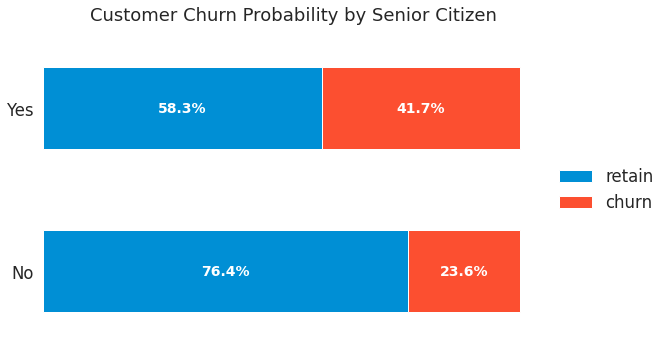

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=data_viz, x='senior_citizen', y='churn', ax=ax, show=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'churn-probability-by-senior-citizen.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

Senior citizens have a higher probability of churn than younger citizens. We can say this attribute has a relationship with churn status.

## 4.4. Churn Probability

### 4.4.1. All Categories

In [ ]:
columns = data_viz['churn']

attr_crosstab = pd.DataFrame()

for col in column_categorical:
  # create crosstab for each attribute
  index = data_viz[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'attribute'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

,attribute,churn,retain
0,Payment Method (Electronic check),0.453,0.547
1,Contract (Month-to-month),0.427,0.573
2,Internet Service (Fiber optic),0.419,0.581
3,Senior Citizen (Yes),0.417,0.583
4,Paperless Billing (Yes),0.336,0.664
5,Partner (No),0.330,0.670
6,Online Security (No),0.313,0.687
7,Dependents (No),0.313,0.687
8,Tech Support (No),0.312,0.688
9,Streaming Tv (Yes),0.301,0.699


### 4.4.2. Top 5 Churn Probability

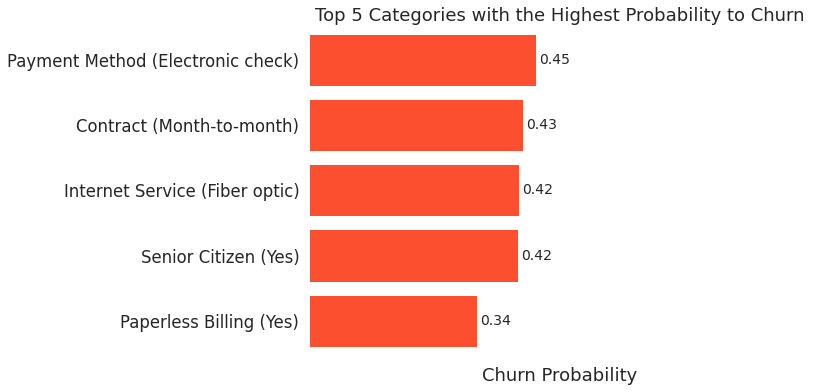

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[:5], x='churn', y='attribute', ax=ax, palette=['#FC4F30'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'top-5-churn-probability.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

### 4.4.3. Top 5 Retain Probability

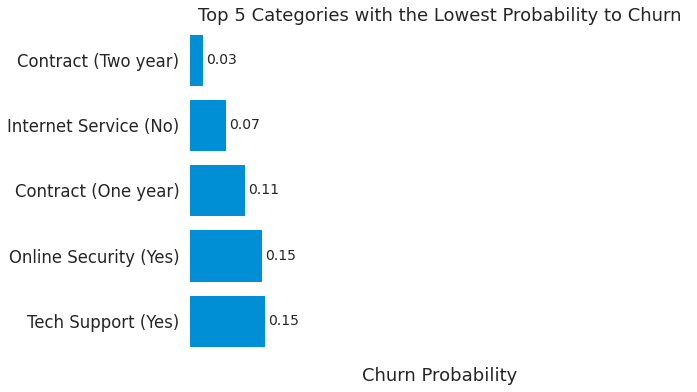

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=attr_crosstab.iloc[-5:].sort_values('churn'), x='churn', y='attribute', ax=ax, palette=['#008FD5'], saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Probability to Churn')

ax.set_xlim(0, 1)
ax.set_ylabel('')
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'top-5-retain-probability.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 4.5. How About The Numerical Data?

### 4.5.1. Churn Probability by Tenure

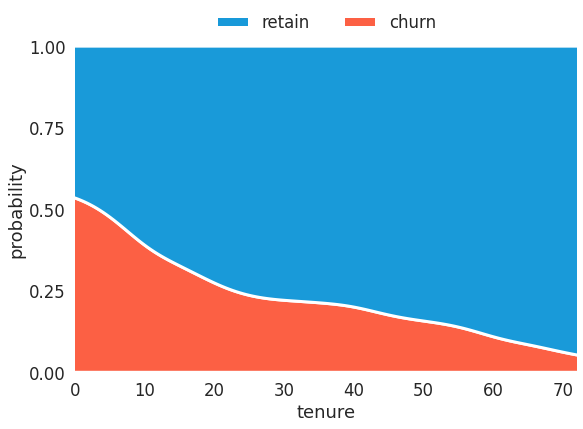

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='tenure', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['tenure'].max(),10))
ax.set_xlim(data_viz['tenure'].min(),data_viz['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'churn-probability-by-tenure.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

It has a clear trend!<br>
I can say, tenure has a negative correlation with the probability of churn.
<br><br>
We can look at the short tenure (let's say the first 5 month), the probability of churn is quite high. I suspect that this is the time for new customers to try the services. Then, they consider whether they will continue to use the services or not.

### 4.5.2. Tenure by Contract Type

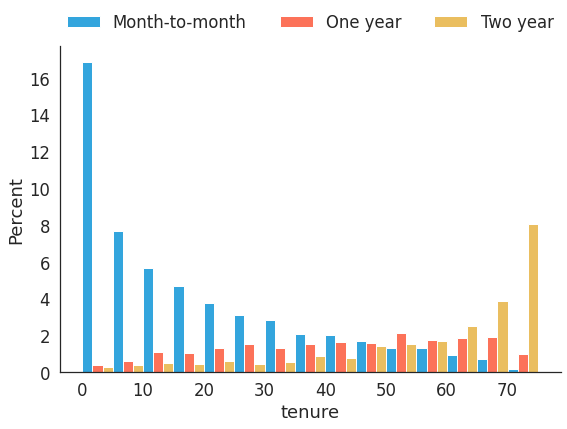

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=data_viz, x='tenure', hue='contract', stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()  

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'tenure-distribution-by-contract.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In the previous section (Churn Probability), I found that month-to-month contracts have a fairly high chance of churn. Morover, it's the second category with the highest probability to churn.
<br><br>
Here, I try to analyze the distribution of tenure based on the type of contract.
<br><br>
It can be seen that customers who take month-to-month contracts mostly have short tenures. There are around 25% of customers who have a month-to-month contract and tenure is less than 5 months.
<br><br>
This could be a new assumption:
- Short tenure means that the customer is still new to the service
- New customers have a tendency to take the shortest contract, i.e. month-to-month contract
<br><br>

It's like when we taste new food. We will try 1 spoon first, not immediately take 1 bowl. If it's good, we'll take more food. If it doesn't taste good, we definitely won't keep eating it. But this is an exception for people who really eat everything huh ~

### 4.5.3. Churn Probability by Monthly Charges

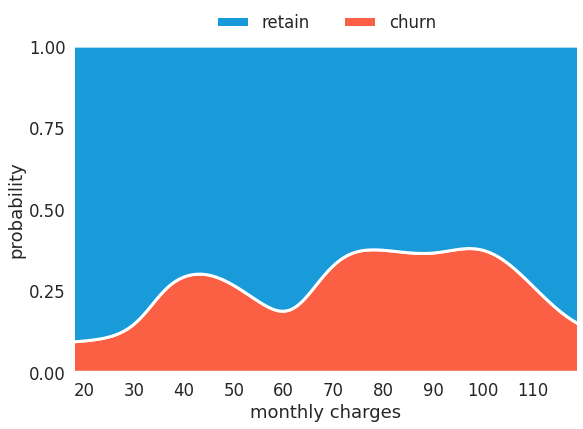

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=data_viz, x='monthly_charges', hue='churn', multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,data_viz['monthly_charges'].max(),10))
ax.set_xlim(data_viz['monthly_charges'].min(),data_viz['monthly_charges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'churn-probability-by-monthly-charges.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

# ax.axis('tight')
plt.show()

It has no clear trend
<br><br>
As we can see, at 60 it goes down, suddenly goes up again, and then drops again when the monthly charges are more than 100.
<br><br>
It can be said that a high price also gets a worthy benefit so that customers feel "Ah, it's worth spending my precious money for this".
<br><br>
Even so, we can suggest the business team minimize this churn rate for some specific segments. For example, by adding certain privileges to customers who have high monthly charges.

### 4.5.4. Numerical Data Distribution

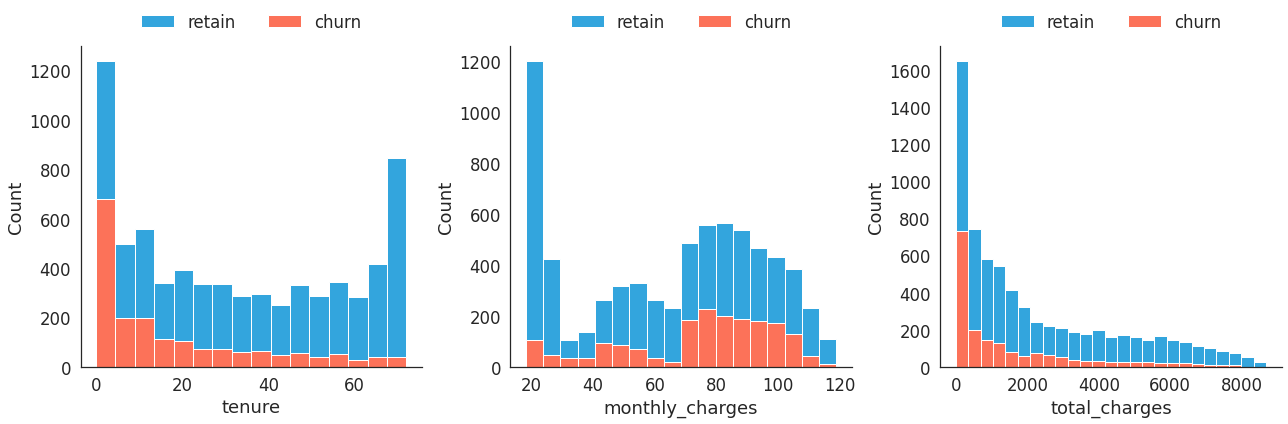

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_viz, x=col, hue='churn', multiple='stack', ax=ax[i], alpha=0.8)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'numerical-data-distribution.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

As we can see, the numerical data distribution is not in normal distribution.

## 4.6. Attribute Associations to Churn Status

"Does this attribute have a strong relationship with churn status?"
<br><br>
To answer this question, I will calculate the association between attributes and target variable. Technically, association refers to any relationship between two variables, whereas correlation is often used to refer only to a linear relationship between two variables. ([Analyse-it](https://analyse-it.com/docs/user-guide/multivariate/correlation))
<br><br>
Cramer’s V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic. ([Wikipedia](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V))
<br><br>
Shaked Zychlinski had made a clear explanation about the correlation between categorical features. You can read it on his [Medium](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9). He also writes his own library, you can find it on his [GitHub](https://github.com/shakedzy/dython). The documentation can be found [here](http://shakedzy.xyz/dython/).
<br><br>
In human language, this associations function is used to calculate the correlation between attributes using some scenarios:
- Numerical & numerical attributes (`num_num_assoc`), used to calculate numerical-numerical association using:
  - Pearson's R (`pearson`)
  - Spearman's R (`spearman`)
  - Kendall's Tau (`kendall`)
- Nominal & nominal attributes (`nom_nom_assoc`), used to calculate nominal-nominal association using:
  - Cramer's V (`cramer`)
  - Theil 's U (`theil`)
- Nominal & numerical attributes (`nom_num_assoc`), used to calculate nominal-numerical association using:
  - Correlation ratio (`correlation_ratio`)
<br><br>

I won't deep down the detailed explanation, you can read it on his Medium or package documentation.

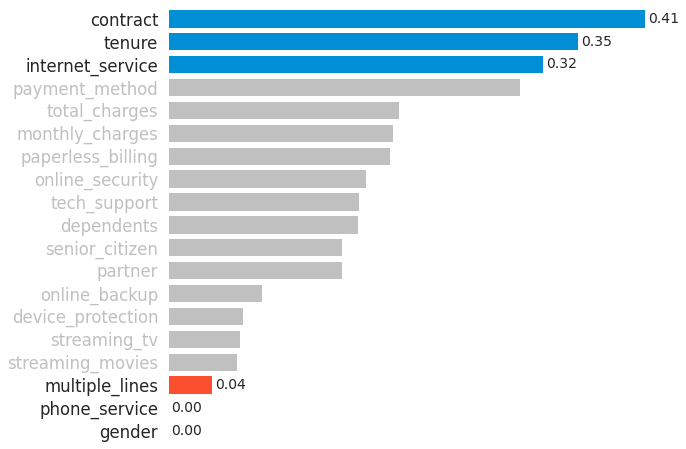

In [ ]:
# calculate the associations (correlation) between features
associations_out = associations(data_viz,
                                nominal_columns=column_categorical,
                                numerical_columns=column_numerical,
                                nom_nom_assoc='cramer',
                                compute_only=True)

# the output is a dict {'ax', 'corr'}
corr_all = associations_out['corr']

corr_target = corr_all['churn'].drop('churn').sort_values(ascending=False)

# custom palette top 3
threshold_top = 3
threshold_bot = corr_target.size - 3 - 1
palette = []
for i in range(0, len(corr_target)):
  if i < threshold_top:
    palette.append('#008FD5') # blue
  elif i > threshold_bot:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette, saturation=1)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if (i >= threshold_top) and (i <= threshold_bot):
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top 3 an bottom 3
  np.put(labels, np.arange(3,labels_len-3), [-1])
  
  # hide the labels for non-top 3 and non-bottom 3
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'attribute-associations-to-churn-status.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

Well, here we can see the association of each attribute with churn status, whether it's retain or churn.
<br><br>
As we can see, the type of contract, tenure, and internet service are the 3 attributes that have the strongest relationship to churn status.
<br><br>
Meanwhile, gender, phone service, and multiple lines are the 3 attributes that have the weakest relationship to churn status.
<br><br>
Always remember, "correlation does not imply causation". I'm just trying to figure out the relationship between the attributes and the target variable, not the causality between them.

# 5. Data Preprocessing

## 5.1. Train - Test Split

I use a 70% : 30% ratio for the training set and testing set respectively.

In [25]:
data_X = data.drop('churn', axis=1)
data_y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

In [ ]:
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (7043, 19)
y shape		: (7043,)

X_train shape	: (4930, 19)
y_train shape	: (4930,)

X_test shape	: (2113, 19)
y_test shape	: (2113,)


## 5.2. Label Encoding

I use it for the target variable (label).

In [26]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [ ]:
le.classes_

array(['No', 'Yes'], dtype=object)

From this output, we can say that retaining customers (`churn = No`) will be encoded as `0`, and churned customers (`churn = Yes`) will be encoded as `1`.

In [ ]:
print(y_train[:5].values)
print(y_train_encode[:5])

['No' 'Yes' 'No' 'Yes' 'No']
[0 1 0 1 0]


## 5.3. One Hot Encoding

I use one-hot encoding for input variables (attributes or features) because each feature has no natural ordering.
<br><br>
I'm dropping 1 category if the feature only has 2 categories. I do this to avoid multicollinearities and redundant columns.
<br><br>
Multicollinearity is a condition where some independent variables are highly correlated to each other. A perfect correlation is a condition when two independent variables have a +1.0 or -1.0 correlation. The perfect correlation between independent variables can lead to a singularity.
<br><br>
The simplest way to solve this problem is dropping 1 column when doing one-hot encoding. We can also drop 1 column only if the feature has a binary category.
<br><br>
The scikit-learn [documentation](https://scikit-learn.org/stable/modules/preprocessing) said: Such functionality is useful, for example, when using non-regularized regression (LinearRegression), since co-linearity would cause the covariance matrix to be non-invertible.
<br><br>
Jessica Miles had written some good explanations about multicollinearity and the effect of dropping a column (first column or average column) from the encoded data. You can read [here](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707).

In [27]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

In [ ]:
X_train_ohe

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

## 5.4. Encoded Dataframe

I will combine the encoded features and the numerical features. Make sure that the index is the same.

In [28]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['gender_Male', 'senior_citizen_Yes', 'partner_Yes',
       'dependents_Yes', 'phone_service_Yes', 'multiple_lines_Yes',
       'internet_service_DSL', 'internet_service_Fiber optic',
       'internet_service_No', 'online_security_Yes', 'online_backup_Yes',
       'device_protection_Yes', 'tech_support_Yes', 'streaming_tv_Yes',
       'streaming_movies_Yes', 'contract_Month-to-month',
       'contract_One year', 'contract_Two year', 'paperless_billing_Yes',
       'payment_method_Bank transfer (automatic)',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype=object)

I will rename the column name to `snake_case` format.

In [29]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('_(automatic)','')

column_ohe

array(['gender_male', 'senior_citizen_yes', 'partner_yes',
       'dependents_yes', 'phone_service_yes', 'multiple_lines_yes',
       'internet_service_dsl', 'internet_service_fiber_optic',
       'internet_service_no', 'online_security_yes', 'online_backup_yes',
       'device_protection_yes', 'tech_support_yes', 'streaming_tv_yes',
       'streaming_movies_yes', 'contract_month_to_month',
       'contract_one_year', 'contract_two_year', 'paperless_billing_yes',
       'payment_method_bank_transfer', 'payment_method_credit_card',
       'payment_method_electronic_check', 'payment_method_mailed_check'],
      dtype=object)

### 5.4.1. Train Set

In [ ]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
6427,Male,No,No,No,41,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.15,802.35
6971,Female,Yes,Yes,No,18,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),99.75,1836.25
96,Male,No,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70
5640,Male,No,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Electronic check,79.60,79.60
414,Female,Yes,Yes,No,48,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.65,3545.05


In [30]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
6427,41,20.15,802.35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6971,18,99.75,1836.25,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,71,66.85,4748.70,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5640,1,79.60,79.60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
414,48,70.65,3545.05,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### 5.4.2. Test Set

In [ ]:
X_test.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
1630,Male,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,102.60,4009.20
2008,Female,No,No,Yes,4,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,87.10,341.45
2685,Female,No,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Two year,No,Bank transfer (automatic),100.65,7334.05
903,Female,No,Yes,No,56,Yes,No,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),105.60,6068.65
3905,Female,No,No,No,3,No,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Credit card (automatic),35.20,108.95


In [31]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_tv_yes,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check
1630,38,102.60,4009.20,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2008,4,87.10,341.45,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2685,72,100.65,7334.05,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
903,56,105.60,6068.65,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3905,3,35.20,108.95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 5.4.3. Encoded Dataframe

In [32]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_encode['churn_1'].fillna(data_encode['churn_2'], inplace=True)
data_encode.drop(columns='churn_2', inplace=True)
data_encode.rename(columns={'churn_1':'churn'}, inplace=True)

data_encode.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,41,20.15,802.35,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,18,99.75,1836.25,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,71,66.85,4748.70,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,1,79.60,79.60,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,48,70.65,3545.05,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


## 5.5. Feature Scaling

Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [33]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])

## 5.6. Scaled Dataframe
This dataframe has been encoded and scaled

In [34]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
data_scale['churn_1'].fillna(data_scale['churn_2'], inplace=True)
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1':'churn'}, inplace=True)

data_scale.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569,0.017,0.092,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6971,0.250,0.811,0.211,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
96,0.986,0.483,0.547,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5640,0.014,0.610,0.009,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
414,0.667,0.521,0.408,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [35]:
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='churn', index=X_train_scale.index)], axis=1)
data_scale_train.head()

,tenure,monthly_charges,total_charges,gender_male,senior_citizen_yes,partner_yes,dependents_yes,phone_service_yes,multiple_lines_yes,internet_service_dsl,...,streaming_movies_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_bank_transfer,payment_method_credit_card,payment_method_electronic_check,payment_method_mailed_check,churn
6427,0.569,0.017,0.092,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
6971,0.250,0.811,0.211,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
96,0.986,0.483,0.547,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
5640,0.014,0.610,0.009,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
414,0.667,0.521,0.408,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0


## 5.7. Correlation

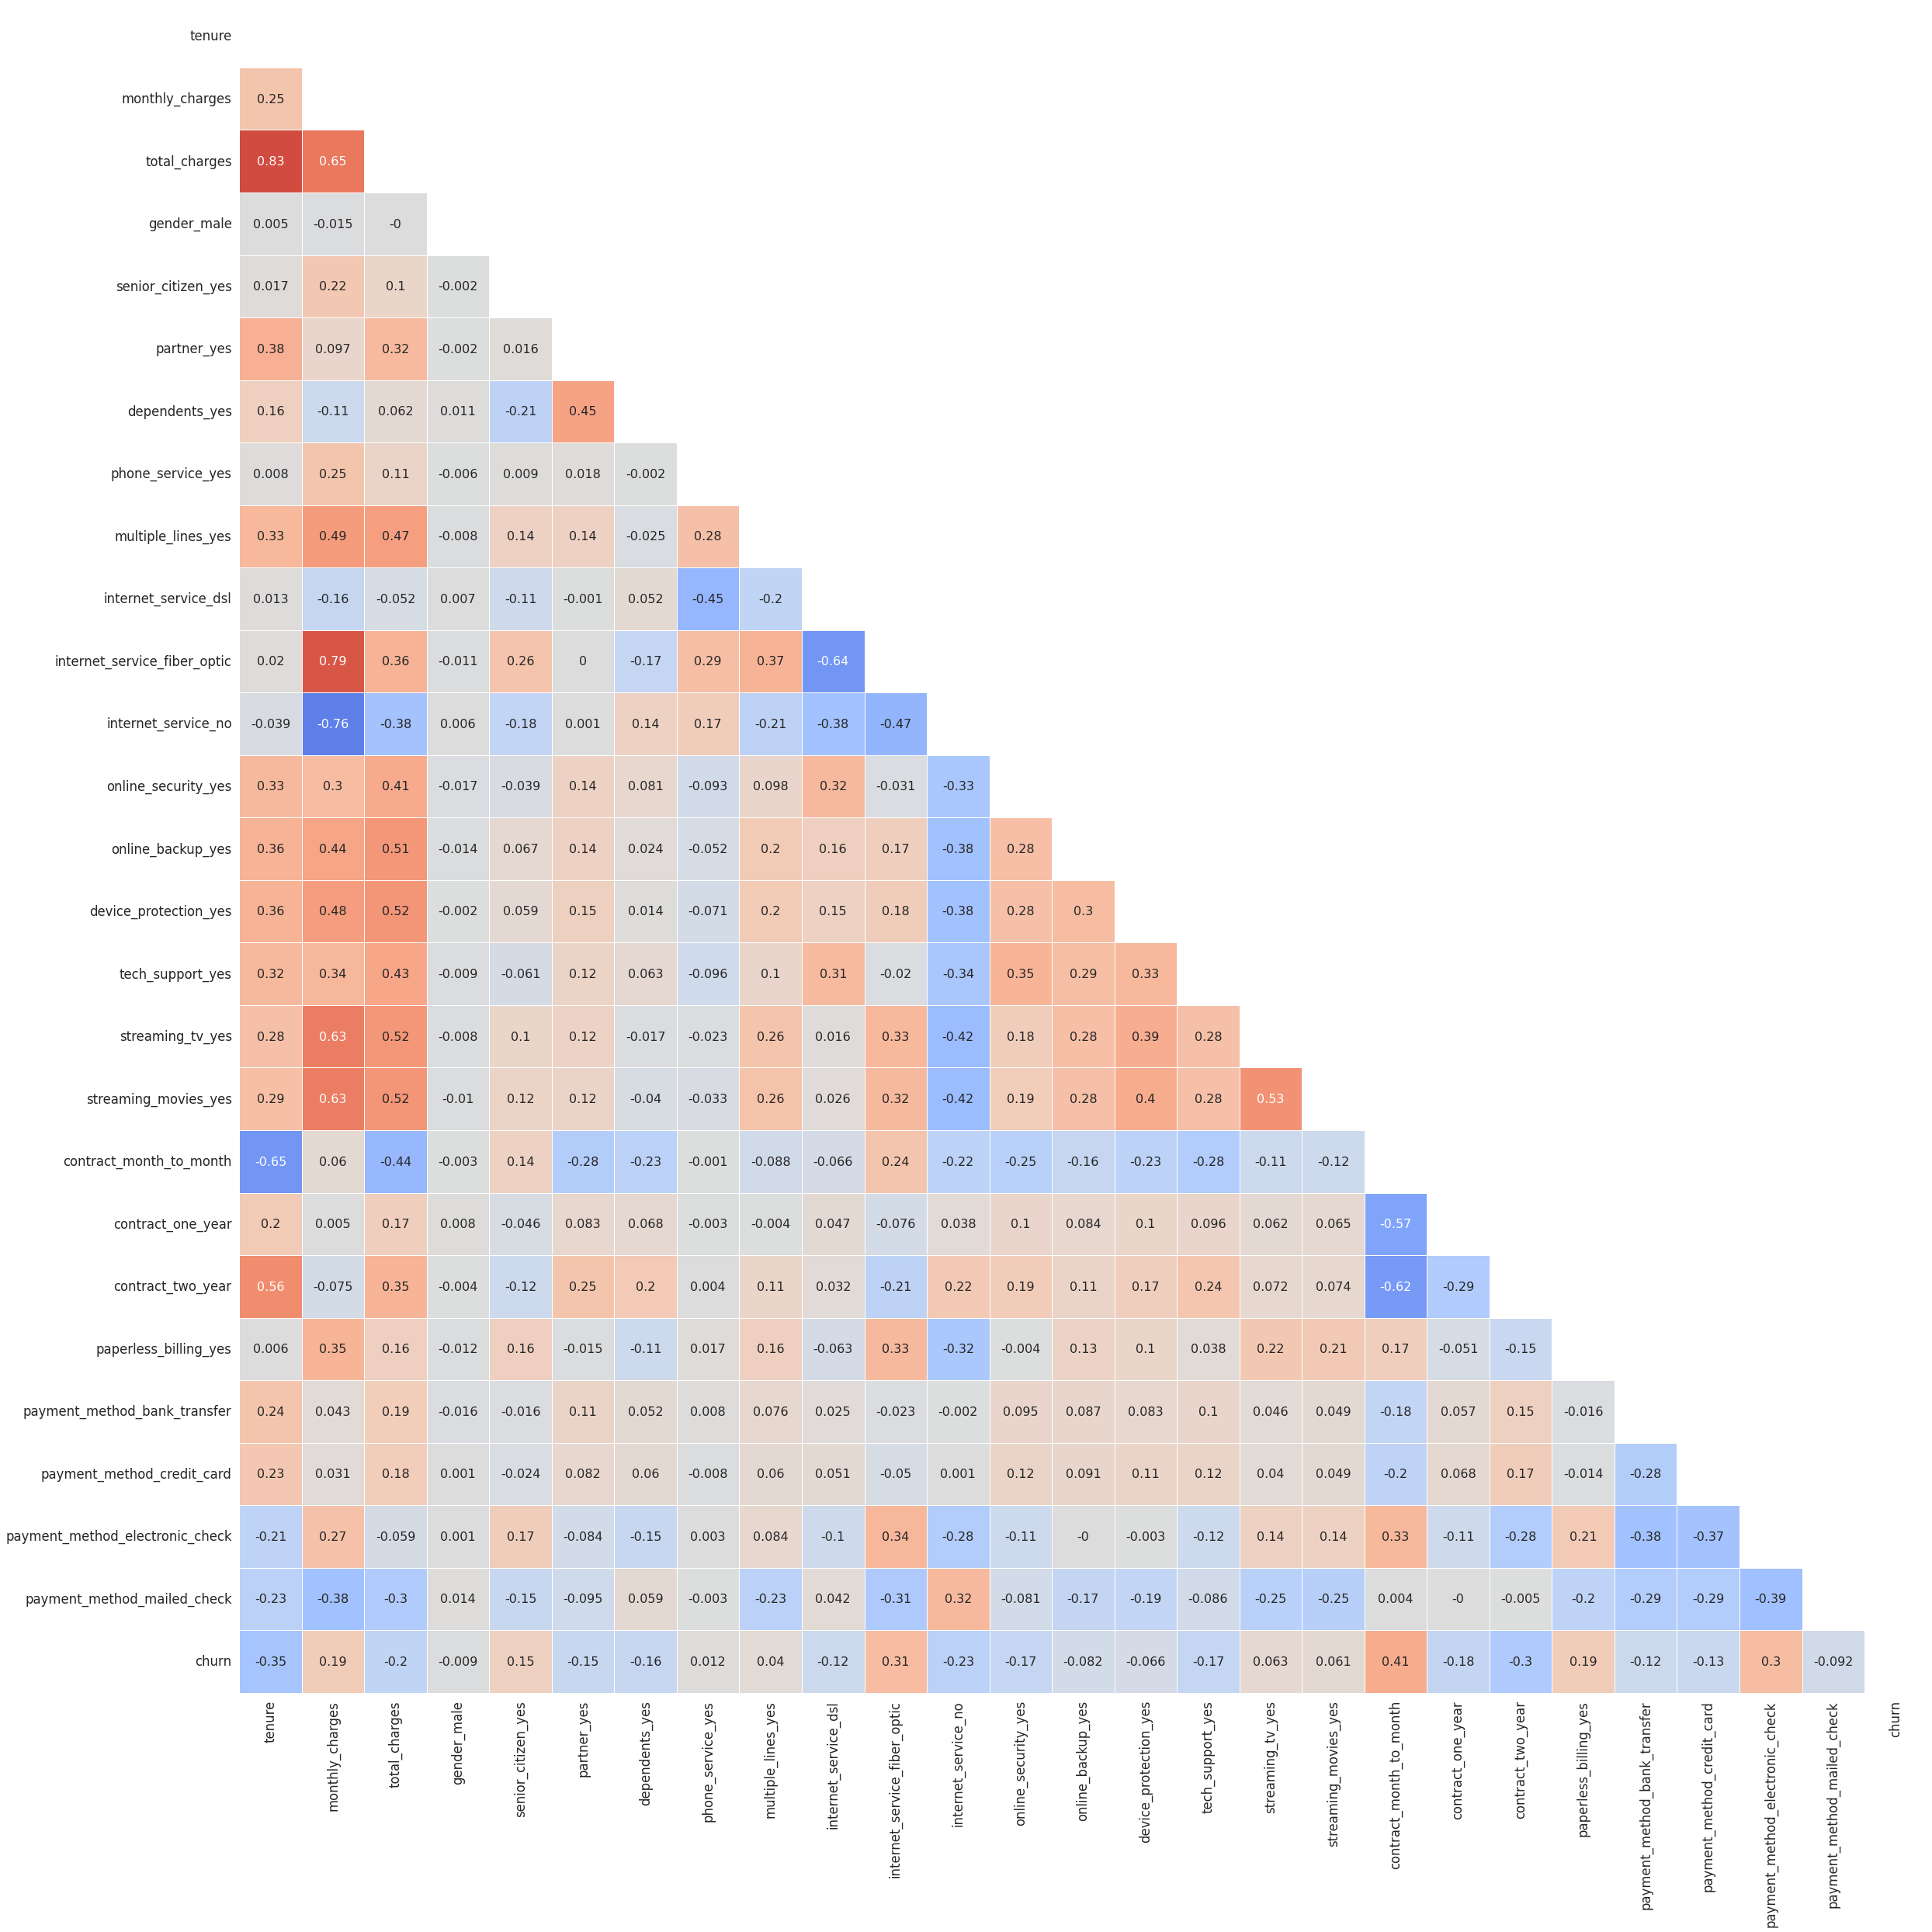

In [ ]:
corr_matrix = data_scale.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

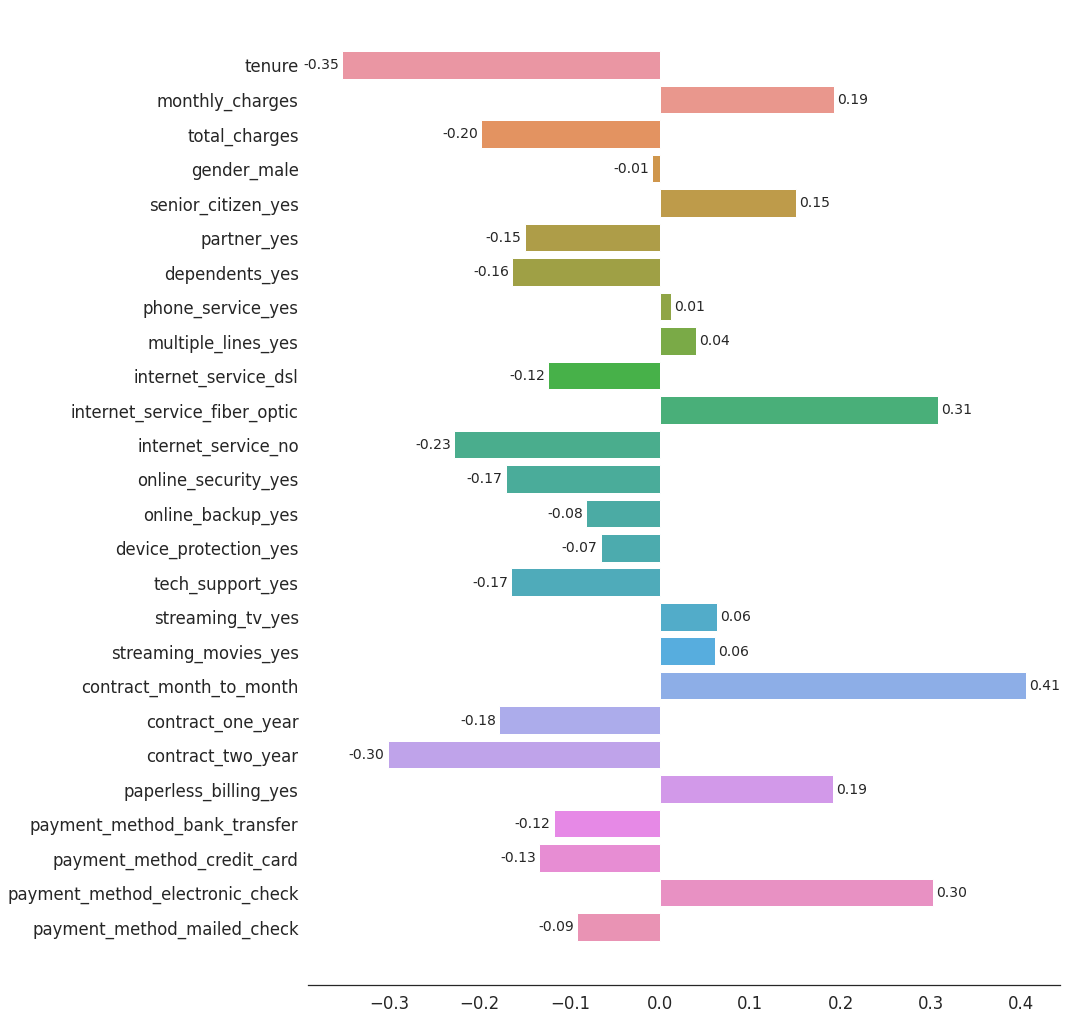

In [ ]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].drop('churn')

fig, ax = plt.subplots(figsize=(12,18))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.axis('tight')
sns.despine(left=True)
plt.show()

### 5.7.1. Positive Correlation

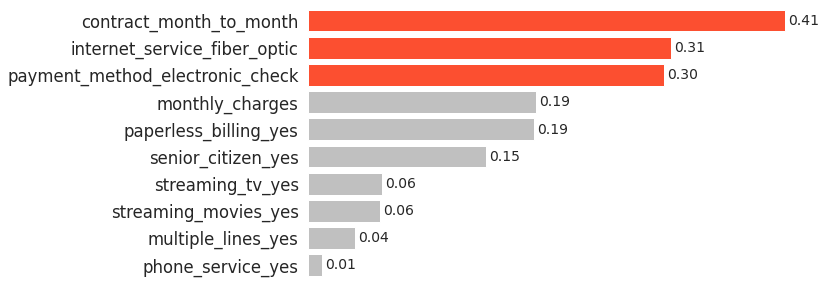

In [ ]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].drop('churn').sort_values(ascending=False)

corr_positive = corr_target[corr_target >= 0]

threshold_top = 3
palette = []
for i in range(0, len(corr_positive)):
  if i < threshold_top:
    palette.append('#FC4F30') # red
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,5))

sns.barplot(x=corr_positive.values, y=corr_positive.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'positive-correlation.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

### 5.7.2. Negative Correlation

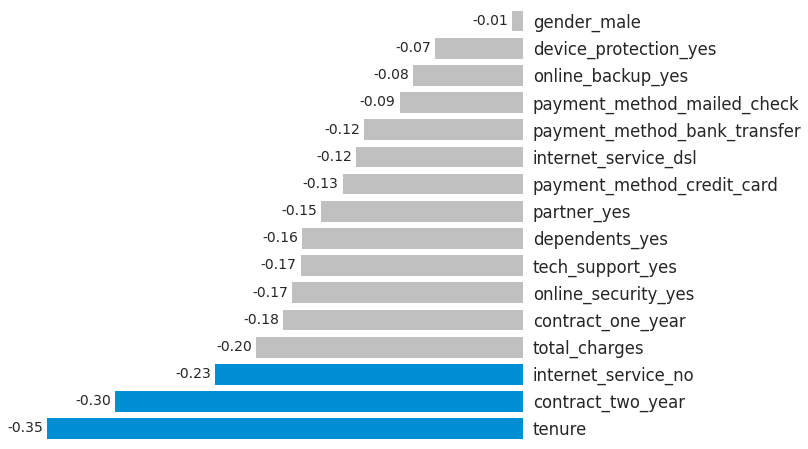

In [ ]:
corr_negative = corr_target[corr_target < 0]

threshold_top = 3
threshold_bot = corr_negative.size - threshold_top - 1
palette = []
for i in range(0, len(corr_negative)):
  if i > threshold_bot:
    palette.append('#008FD5') # blue
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([])

sns.despine(left=True, bottom=True)
plt.tick_params(right=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'negative-correlation.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 5.8. Oversampling with SMOTE

This dataset is imbalanced. So, my approach to get it balanced is to use SMOTE, one of the oversampling methods.

In [36]:
# numerical
column_numerical = ['tenure', 'monthly_charges', 'total_charges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthly_charges')
column_categorical.remove('total_charges')

In [37]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

Let's take a look at the balanced dataframe.

In [ ]:
data_scale_train['churn'].value_counts()

0    3622
1    1308
Name: churn, dtype: int64

In [ ]:
data_smote['churn'].value_counts()

0    3622
1    3622
Name: churn, dtype: int64

Now, both retain (0) and churn (1) categories have the same number.

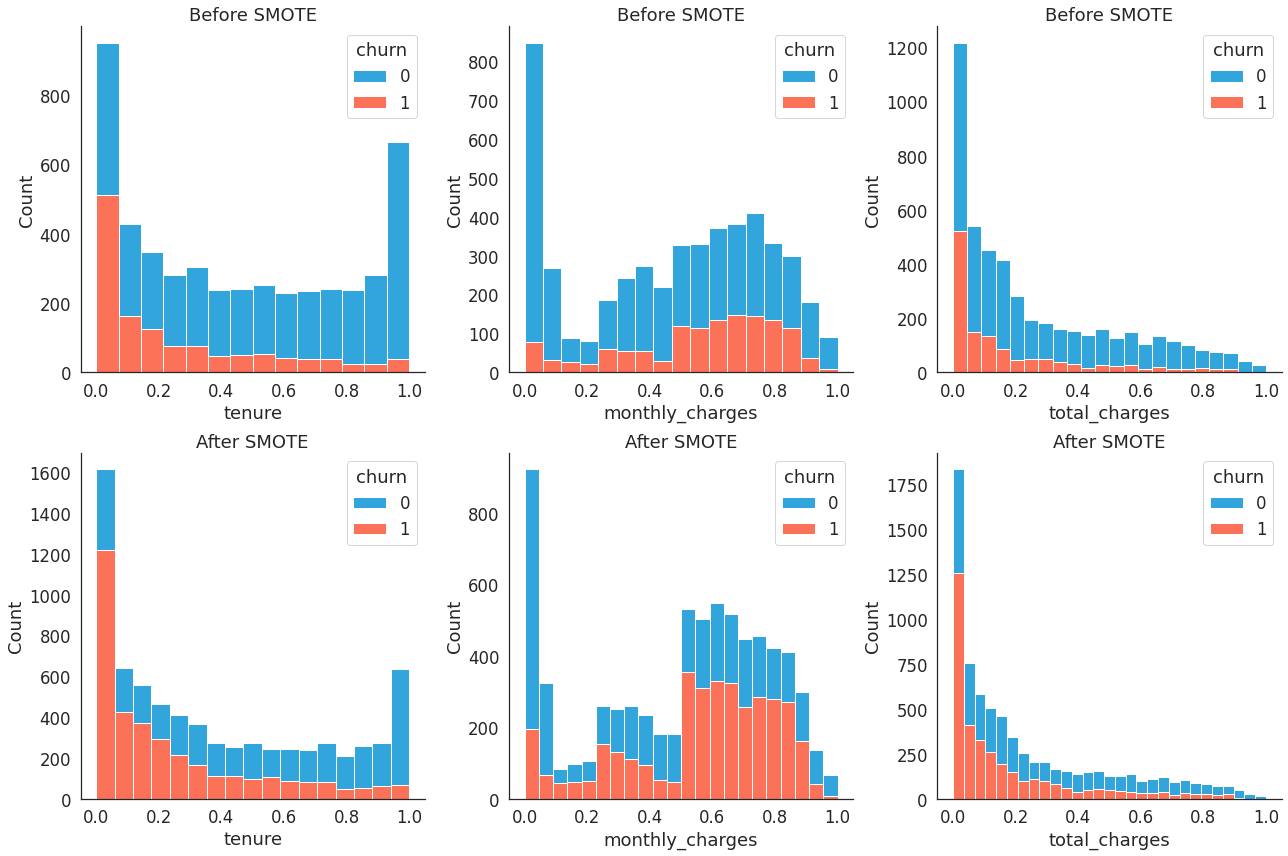

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_scale_train, x=col, hue='churn', multiple='stack', ax=axes_list[i], alpha=0.8)
  axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_smote, x=col, hue='churn', multiple='stack', ax=axes_list[i+3], alpha=0.8)
  axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

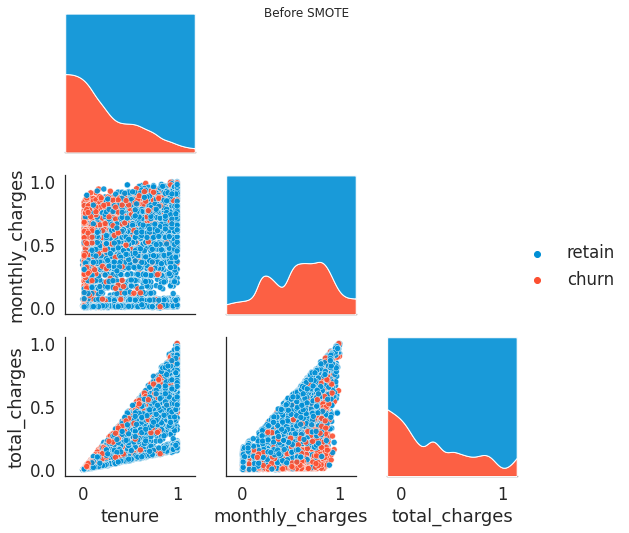

In [ ]:
tmp_df = data_scale_train.copy()
tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('Before SMOTE')

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'data-distribution-before-smote.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

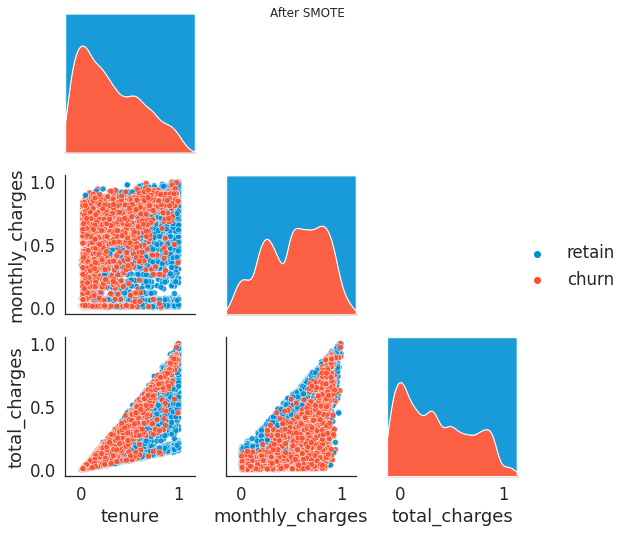

In [ ]:
tmp_df = data_smote.copy()
tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('After SMOTE')

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'data-distribution-after-smote.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

# 6. Model Development & Evaluation

## 6.1. Scoring Function

### 6.1.1. Get Score

In [38]:
def get_score(y_pred_list, y_test, average=None, show=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if show:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

### 6.1.2. Harmonic Mean
Harmonic mean between accuracy and recall

In [39]:
def fbeta_score(accuracy, recall, beta=1):
  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)
  
  return fbeta_score

## 6.2. Default Parameter

In [40]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [ ]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.747,0.707,0.755,0.714,0.755
Ridge Classifier,0.744,0.707,0.756,0.713,0.756
KNN,0.696,0.660,0.699,0.661,0.699
SVC,0.765,0.713,0.747,0.724,0.747
Neural Network,0.752,0.686,0.696,0.690,0.696
Decision Tree,0.731,0.666,0.682,0.672,0.682
Random Forest,0.771,0.708,0.714,0.711,0.714
Gradient Boosting Classifier,0.788,0.734,0.763,0.744,0.763
AdaBoost Classifier,0.755,0.712,0.756,0.720,0.756


Overall, boosting methods show a good performance. So, I will only use the boosting methods for the next process.

In [ ]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [41]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.747,0.707,0.755,0.714,0.755
Ridge Classifier,0.744,0.707,0.756,0.713,0.756
KNN,0.696,0.660,0.699,0.661,0.699
SVC,0.765,0.713,0.747,0.724,0.747
Neural Network,0.752,0.686,0.696,0.690,0.696
Decision Tree,0.731,0.666,0.682,0.672,0.682
Random Forest,0.771,0.708,0.714,0.711,0.714
Gradient Boosting Classifier,0.788,0.734,0.763,0.744,0.763
AdaBoost Classifier,0.755,0.712,0.756,0.720,0.756


Can we improve it?

## 6.3. Feature Selection

### 6.3.1. Univariate Filter

I will use ANOVA to do feature selection.

In [42]:
threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (7244, 26)
after filter	: (7244, 13)


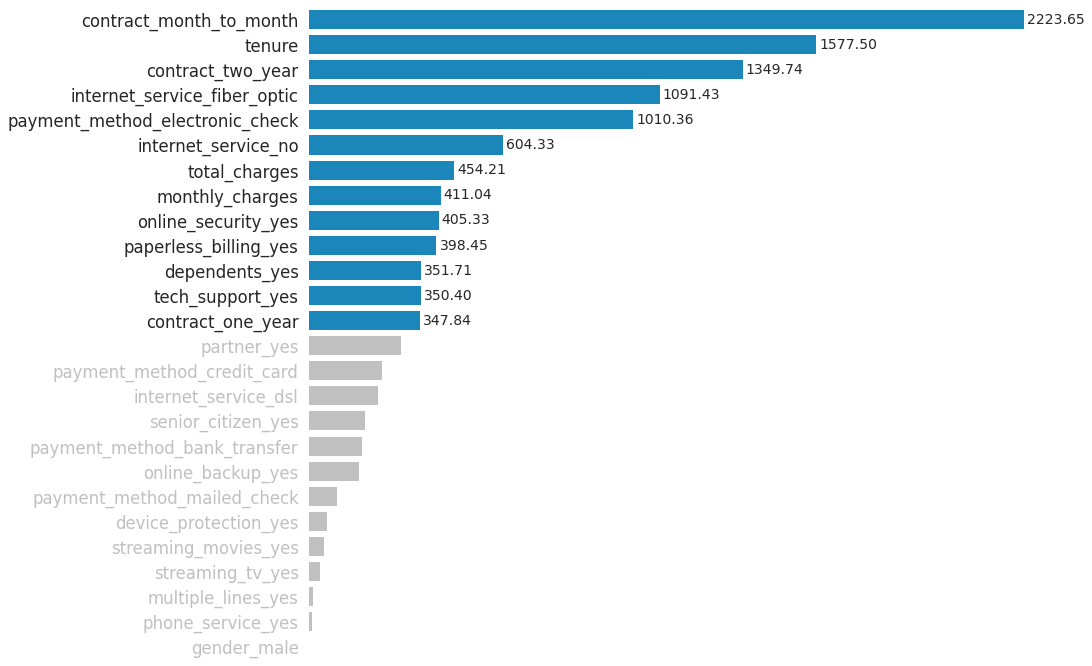

In [ ]:
# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'feature-selection-filter-method.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [43]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_filter = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.745,0.707,0.756,0.714,0.756
Ridge Classifier,0.742,0.705,0.753,0.710,0.753
KNN,0.735,0.676,0.700,0.684,0.700
SVC,0.757,0.713,0.756,0.722,0.756
Neural Network,0.754,0.709,0.751,0.718,0.751
Decision Tree,0.725,0.659,0.675,0.665,0.675
Random Forest,0.768,0.706,0.720,0.712,0.720
Gradient Boosting Classifier,0.772,0.721,0.757,0.732,0.757
AdaBoost Classifier,0.755,0.715,0.762,0.723,0.762


### 6.3.2. Wrapper Method

I will use Recursive Feature Elimination (RFE) method  using logistic regression as its base estimator.

In [44]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

threshold = 13
estimator = LogisticRegression(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap = wrapper.transform(X_train_model)
X_test_wrap = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap.shape)

before wrapper	: (7244, 26)
after wrapper	: (7244, 13)


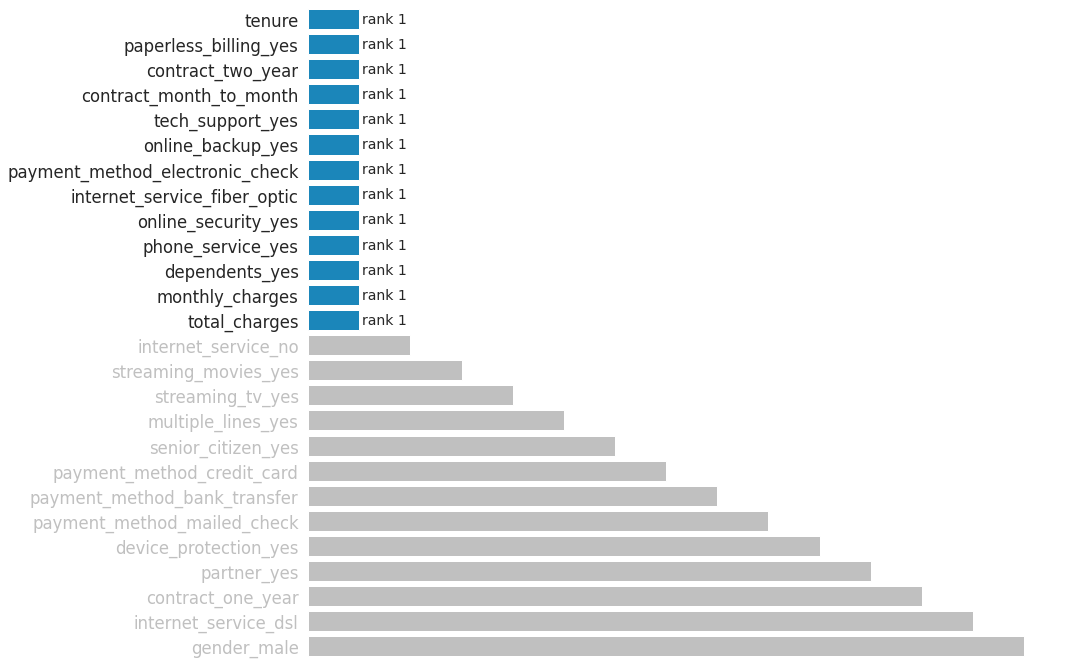

In [ ]:
# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'rank {val:.0f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'feature-selection-wrapper-method.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [45]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap)

score_wrap = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.750,0.712,0.760,0.719,0.760
Ridge Classifier,0.749,0.710,0.758,0.717,0.758
KNN,0.725,0.668,0.695,0.675,0.695
SVC,0.756,0.708,0.748,0.718,0.748
Neural Network,0.742,0.700,0.744,0.707,0.744
Decision Tree,0.725,0.658,0.673,0.664,0.673
Random Forest,0.773,0.712,0.722,0.716,0.722
Gradient Boosting Classifier,0.778,0.727,0.762,0.738,0.762
AdaBoost Classifier,0.755,0.712,0.758,0.721,0.758


### 6.3.3. Embedded Method

I will use logistic regression as its base estimator.

In [46]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression(random_state=1)

embedded = SelectFromModel(estimator=estimator, threshold='median')
embedded.fit(X_train_model, y_train_model)

X_train_embed = embedded.transform(X_train_model)
X_test_embed = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed.shape)

before embedded	: (7244, 26)
after embedded	: (7244, 13)


threshold: 0.300


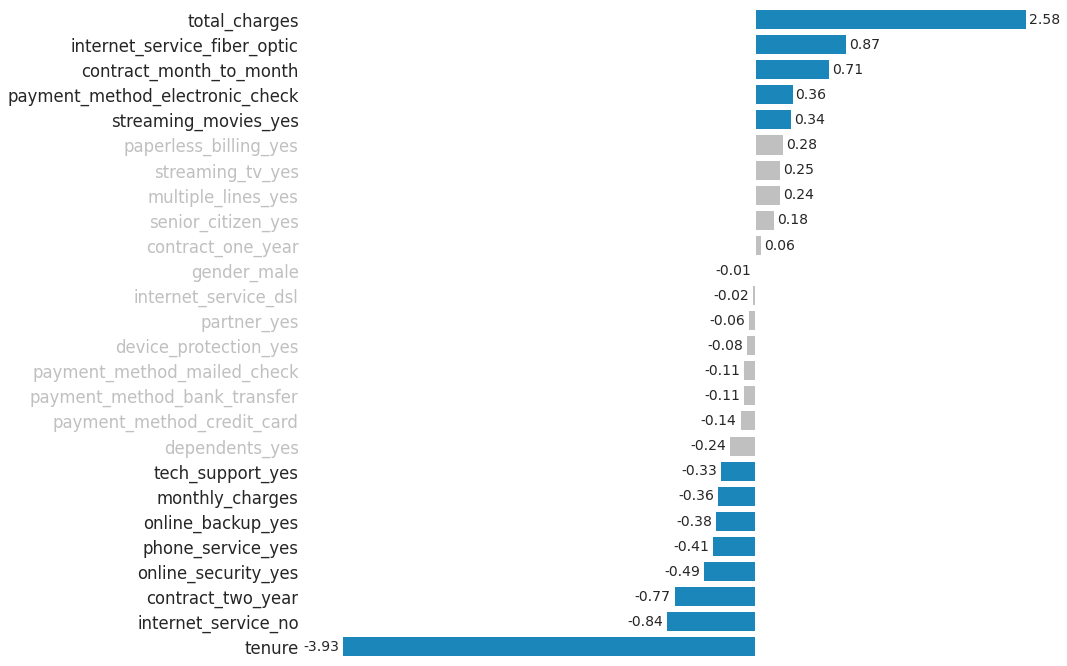

In [ ]:
# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
print(f'threshold: {threshold:.3f}')
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# highlight the top features
palette = []
for flag in feature_selection['selected']:
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'feature-selection-embedded-method.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

In [47]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed)

score_embed = get_score(y_pred_list, y_test_model, average='macro')

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
model,,,,,
Logistic Regression,0.743,0.706,0.754,0.712,0.754
Ridge Classifier,0.741,0.705,0.754,0.710,0.754
KNN,0.740,0.687,0.718,0.695,0.718
SVC,0.752,0.706,0.748,0.715,0.748
Neural Network,0.735,0.701,0.750,0.705,0.750
Decision Tree,0.726,0.659,0.674,0.665,0.674
Random Forest,0.762,0.700,0.715,0.706,0.715
Gradient Boosting Classifier,0.767,0.717,0.753,0.727,0.753
AdaBoost Classifier,0.744,0.703,0.748,0.710,0.748


### 6.3.4. Comparison

I do model performance comparison before and after feature selection.  I'll just take the average of each metrics.

In [48]:
score_smote_mean = pd.DataFrame(score_smote.mean(), columns=['original']).T
score_filter_mean = pd.DataFrame(score_filter.mean(), columns=['filter method']).T
score_wrap_mean = pd.DataFrame(score_wrap.mean(), columns=['wrapper method']).T
score_embed_mean = pd.DataFrame(score_embed.mean(), columns=['embedded method']).T

score_compare = pd.concat([score_smote_mean,
                           score_filter_mean,
                           score_wrap_mean,
                           score_embed_mean], axis=0)

score_compare.style.background_gradient(axis=0)

,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,roc_auc
original,0.760,0.707,0.732,0.713,0.732
filter method,0.759,0.708,0.741,0.716,0.741
wrapper method,0.759,0.708,0.739,0.715,0.739
embedded method,0.753,0.704,0.738,0.711,0.738


From this table, original feature aka without feature selection have the highest accuracy. But, it has the lowest recall score.
<br><br>
I think, filter method gives the best performances.
<br><br>
On the next step (hyperparameter tuning), I will only use original feature and feature after feature selection using filter method.

## 6.4. Hyperparameter Tuning

My tuning strategy focuses on optimizing the positive recall value (not the average) to minimize the occurrence of false negatives, which is when we incorrectly predict customers who actually churn as non-churn. This is because the cost of acquiring new customers is more expensive than retaining existing customers.
<br><br>
But, I still pay attention to the accuracy score as well.
<br><br>
Anyway, I'd already done the hyperparameter tuning, so I won't cover the process here. As you know, the process takes a long time.
<br><br>
You can do your own tuning if you wish, and maybe you'll get a better result, who knows.

In [49]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [50]:
model_list_tuned = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1,
                                                              max_depth=2,
                                                              n_estimators=500,
                                                              learning_rate=0.02),
              
    'AdaBoost Classifier':AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, max_depth=2),
                                             random_state=1,
                                             n_estimators=80,
                                             learning_rate=0.04),
              
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False,
                                             n_estimators=1000,
                                             learning_rate=0.004,
                                             scale_pos_weight=1.1),
              
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1,
                                                            max_iter=200, 
                                                            learning_rate=0.01,
                                                            max_depth=5),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss',
                            colsample_bytree=0.1,
                            learning_rate=0.005),
              
    'LightGBM':LGBMClassifier(random_state=1,
                              num_leaves=10,
                              n_estimators=175,
                              learning_rate=0.01)
}

### 6.4.1. Without Feature Selection

#### Before Tuning

In [51]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_not_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.788,0.582,0.709,0.639,0.763
AdaBoost Classifier,0.755,0.527,0.759,0.622,0.756
CatBoost Classifier,0.786,0.594,0.606,0.600,0.728
Hist Gradient Boosting,0.780,0.584,0.599,0.592,0.722
XGBoost,0.784,0.574,0.715,0.637,0.762
LightGBM,0.785,0.590,0.619,0.604,0.732


#### After Tuning

In [52]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.783,0.571,0.742,0.645,0.770
AdaBoost Classifier,0.762,0.536,0.772,0.633,0.765
CatBoost Classifier,0.772,0.553,0.740,0.633,0.762
Hist Gradient Boosting,0.763,0.538,0.774,0.635,0.767
XGBoost,0.772,0.552,0.763,0.640,0.769
LightGBM,0.760,0.533,0.783,0.634,0.767


#### Comparison

In [53]:
score_compare_accuracy = score_no_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_no_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

,accuracy_not_tuned,accuracy_tuned
model,,
Gradient Boosting Classifier,0.788,0.783
AdaBoost Classifier,0.755,0.762
CatBoost Classifier,0.786,0.772
Hist Gradient Boosting,0.780,0.763
XGBoost,0.784,0.772
LightGBM,0.785,0.760


After tuning, the accuracy score is mostly decreased.

In [ ]:
score_compare_recall = score_no_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_no_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

,recall_not_tuned,recall_tuned
model,,
Gradient Boosting Classifier,0.709,0.742
AdaBoost Classifier,0.759,0.772
CatBoost Classifier,0.606,0.740
Hist Gradient Boosting,0.599,0.774
XGBoost,0.715,0.763
LightGBM,0.619,0.783


But, the recall score has increased dramatically. Therefore, I will use the tuned model for model selection.

### 6.4.2. With Feature Selection

#### Before Tuning

In [54]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_not_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.772,0.554,0.725,0.629,0.757
AdaBoost Classifier,0.755,0.527,0.777,0.628,0.762
CatBoost Classifier,0.788,0.588,0.677,0.630,0.753
Hist Gradient Boosting,0.773,0.561,0.668,0.610,0.740
XGBoost,0.774,0.555,0.752,0.638,0.767
LightGBM,0.777,0.569,0.663,0.612,0.741


#### After Tuning

In [55]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_tuned = get_score(y_pred_list, y_test_model)

,accuracy,precision,recall,f1_score,roc_auc
model,,,,,
Gradient Boosting Classifier,0.775,0.555,0.766,0.644,0.772
AdaBoost Classifier,0.759,0.531,0.783,0.633,0.766
CatBoost Classifier,0.761,0.536,0.765,0.630,0.763
Hist Gradient Boosting,0.756,0.528,0.781,0.630,0.764
XGBoost,0.761,0.534,0.779,0.633,0.766
LightGBM,0.762,0.536,0.791,0.639,0.772


#### Comparison

In [56]:
score_compare_accuracy = score_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

,accuracy_not_tuned,accuracy_tuned
model,,
Gradient Boosting Classifier,0.772,0.775
AdaBoost Classifier,0.755,0.759
CatBoost Classifier,0.788,0.761
Hist Gradient Boosting,0.773,0.756
XGBoost,0.774,0.761
LightGBM,0.777,0.762


After tuning, the accuracy score is mostly decreased.

In [ ]:
score_compare_recall = score_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

,recall_not_tuned,recall_tuned
model,,
Gradient Boosting Classifier,0.725,0.766
AdaBoost Classifier,0.777,0.783
CatBoost Classifier,0.677,0.765
Hist Gradient Boosting,0.668,0.781
XGBoost,0.752,0.779
LightGBM,0.663,0.791


But, the recall score has increased dramatically. Therefore, I will use the tuned model for model selection.

## 6.5. Model Selection

At first, I was a little hesitant about choosing a model, because I'm paying attention to the recall score and accuracy score at the same time.
<br><br>
At the end of the day, I decided to use the F-beta score to calculate the harmonic mean of accuracy and recall.
<br><br>
$$F_{\beta}=(1+\beta^{2})\frac{accuracy*recall}{\beta*accuracy+recall}$$
<br><br>
Here I use `beta=1`, that means the accuracy and recall are considered as equally important. If you more care about recall, you can change ${\beta}$ to be higher than 1, and vice versa.
<br><br>
You may familiar with this equation from F1 score. Actually, it has the same formula where the `beta=1` (that's why it's called `F1`). But, on F1 score, we use precision instead of accuracy.

### 6.5.1. Without Feature Selection

In [57]:
accuracy = score_no_fs_tuned['accuracy']
recall = score_no_fs_tuned['recall']

score_no_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_no_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

,accuracy,recall,fbeta
model,,,
Gradient Boosting Classifier,0.783,0.742,0.762
AdaBoost Classifier,0.762,0.772,0.767
CatBoost Classifier,0.772,0.740,0.755
Hist Gradient Boosting,0.763,0.774,0.768
XGBoost,0.772,0.763,0.768
LightGBM,0.760,0.783,0.771


As we can see, the Gradient Boosting classifier has the highest accuracy score, but (almost) has the lowest recall score.
<br><br>
Contrary, the LightGBM classifier has the lowest accuracy score but has the highest recall score. Moreover, it has the highest F-beta score.
<br><br>
Therefore, the selected model that uses all features (without feature selection) is LightGBM.

### 6.5.2. With Feature Selection

In [58]:
accuracy = score_fs_tuned['accuracy']
recall = score_fs_tuned['recall']

score_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

,accuracy,recall,fbeta
model,,,
Gradient Boosting Classifier,0.775,0.766,0.771
AdaBoost Classifier,0.759,0.783,0.770
CatBoost Classifier,0.761,0.765,0.763
Hist Gradient Boosting,0.756,0.781,0.768
XGBoost,0.761,0.779,0.770
LightGBM,0.762,0.791,0.777


As we can see, the Gradient Boosting classifier has the highest accuracy score, but (almost) has the lowest recall score.
<br><br>
Contrary, the LightGBM classifier has a moderate accuracy score but has the highest recall score. Moreover, it has the highest F-beta score.
<br><br>
Therefore, the selected model that uses feature selection is LightGBM.
<br><br>
If we compare the LightGBM classifier using all features and feature selection, the second one has higher performance. So, I'll use it as my final model.

# 7. Conculsion

**Final Model**<br>
LightGBM with feature selection using filter method
<br><br>
**Recommendation and Request**<br>
- We should pay more attention to customers who meet the criteria below
  - Contract: Month-to-month
  - Tenure: Short tenure
  - Internet service: Fiber optic
  - Payment method: Electronic check

- Please, evaluate our service! <br>
  Especially for internet service (fiber optic) and payment method (electronic check)
- Can we give more benefit to a new customer? <br>
Because the new customer has a high probability to churn


# 8. Explainable AI

## 8.1. Data Preparation

In [ ]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

threshold = 13

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

# selected feature
selected_feature = filter.get_feature_names_out()

# create selected feature dataframe
X_train_filter_dict = dict()
X_test_filter_dict = dict()

for i, feature in enumerate(selected_feature):
  X_train_filter_dict[feature] = X_train_filter[:,i]
  X_test_filter_dict[feature] = X_test_filter[:,i]

X_train_filter = pd.DataFrame(X_train_filter_dict)
X_test_filter = pd.DataFrame(X_test_filter_dict)

## 8.2. Final Model

In [ ]:
model = LGBMClassifier(random_state=1, num_leaves=10, n_estimators=175, learning_rate=0.01)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.909     0.752     0.823      1552
           1      0.536     0.791     0.639       561

    accuracy                          0.762      2113
   macro avg      0.722     0.772     0.731      2113
weighted avg      0.810     0.762     0.774      2113



In [ ]:
y_test_model[1]

1

In [ ]:
y_pred[1]

1

## 8.3. SHAP Explainer

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.
<br><br>
See [papers](https://github.com/slundberg/shap#citations) for details and citations.

### 8.3.1. Single Input

In [ ]:
input_test = pd.DataFrame(X_test_filter.iloc[1]).T
input_test

,tenure,monthly_charges,total_charges,dependents_yes,internet_service_fiber_optic,internet_service_no,online_security_yes,tech_support_yes,contract_month_to_month,contract_one_year,contract_two_year,paperless_billing_yes,payment_method_electronic_check
1,0.056,0.685,0.039,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
explainer = shap.Explainer(model)
shap_values_single = explainer(input_test)

expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: [0.04024755709891011, -0.04024755709891011]


In [ ]:
shap_values_single

.values =
array([[[-0.23591597,  0.23591597],
        [-0.00421639,  0.00421639],
        [-0.00069374,  0.00069374],
        [ 0.05909183, -0.05909183],
        [-0.29172341,  0.29172341],
        [-0.01303441,  0.01303441],
        [-0.01622585,  0.01622585],
        [ 0.18345999, -0.18345999],
        [-0.56539986,  0.56539986],
        [ 0.02007509, -0.02007509],
        [-0.08980129,  0.08980129],
        [-0.0026877 ,  0.0026877 ],
        [ 0.16627858, -0.16627858]]])

.base_values =
array([[ 0.04024756, -0.04024756]])

.data =
array([[0.05555556, 0.68460389, 0.03931582, 1.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [ ]:
shap_values_single[:,:,-1]

.values =
array([[ 0.23591597,  0.00421639,  0.00069374, -0.05909183,  0.29172341,
         0.01303441,  0.01622585, -0.18345999,  0.56539986, -0.02007509,
         0.08980129,  0.0026877 , -0.16627858]])

.base_values =
array([-0.04024756])

.data =
array([[0.05555556, 0.68460389, 0.03931582, 1.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

### 8.3.2. Multiple Input

In [ ]:
shap_values_multiple = explainer(X_test_filter)
expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: [0.04024755709891011, -0.04024755709891011]


In [ ]:
shap_values_multiple[:2]

.values =
array([[[ 0.29423629, -0.29423629],
        [-0.06061167,  0.06061167],
        [ 0.0208548 , -0.0208548 ],
        [-0.00943166,  0.00943166],
        [-0.2676755 ,  0.2676755 ],
        [-0.01478274,  0.01478274],
        [-0.05450814,  0.05450814],
        [-0.02310107,  0.02310107],
        [-0.45339489,  0.45339489],
        [ 0.02868916, -0.02868916],
        [-0.10925357,  0.10925357],
        [-0.05180194,  0.05180194],
        [-0.18280552,  0.18280552]],

       [[-0.23591597,  0.23591597],
        [-0.00421639,  0.00421639],
        [-0.00069374,  0.00069374],
        [ 0.05909183, -0.05909183],
        [-0.29172341,  0.29172341],
        [-0.01303441,  0.01303441],
        [-0.01622585,  0.01622585],
        [ 0.18345999, -0.18345999],
        [-0.56539986,  0.56539986],
        [ 0.02007509, -0.02007509],
        [-0.08980129,  0.08980129],
        [-0.0026877 ,  0.0026877 ],
        [ 0.16627858, -0.16627858]]])

.base_values =
array([[ 0.04024756, -0.04024756],

In [ ]:
shap_values_multiple[:,:,-1][:2]

.values =
array([[-0.29423629,  0.06061167, -0.0208548 ,  0.00943166,  0.2676755 ,
         0.01478274,  0.05450814,  0.02310107,  0.45339489, -0.02868916,
         0.10925357,  0.05180194,  0.18280552],
       [ 0.23591597,  0.00421639,  0.00069374, -0.05909183,  0.29172341,
         0.01303441,  0.01622585, -0.18345999,  0.56539986, -0.02007509,
         0.08980129,  0.0026877 , -0.16627858]])

.base_values =
array([-0.04024756, -0.04024756])

.data =
array([[0.52777778, 0.83906328, 0.46163412, 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        ],
       [0.05555556, 0.68460389, 0.03931582, 1.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

## 8.4. Bar Plot

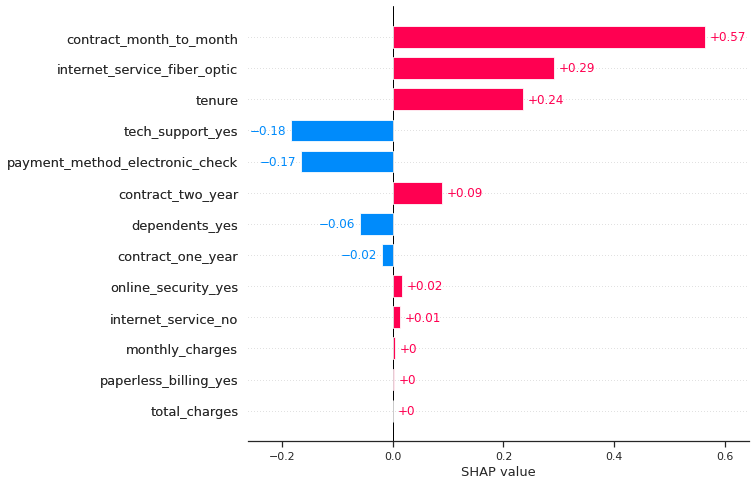

In [ ]:
shap.plots.bar(shap_values_single[:,:,-1][0], max_display=20, show=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'shap-bar-plot.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 8.5. Beeswarm Summary Plot

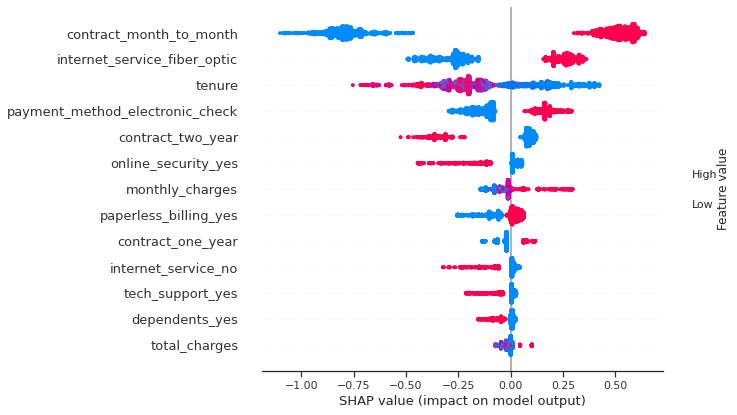

In [ ]:
shap.plots.beeswarm(shap_values_multiple[:,:,-1], max_display=20, show=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'shap-beeswarm-summary-plot.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 8.6. Decision Plot

### 8.6.1. Single Input

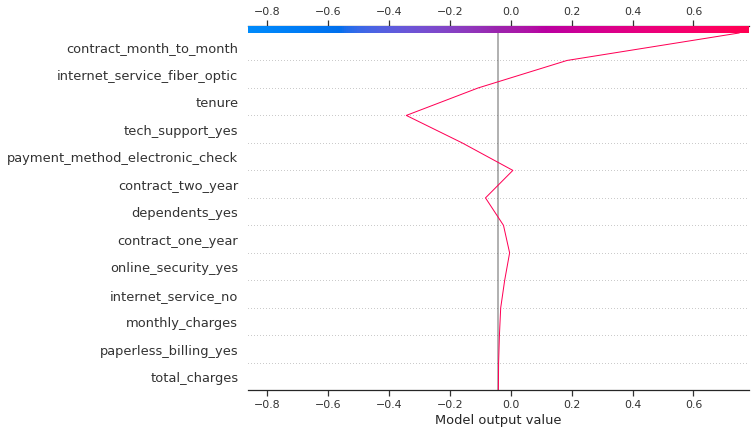

In [ ]:
shap.decision_plot(expected_value[-1], shap_values_single[:,:,-1].values, input_test.columns, show=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'shap-single-decision-plot.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

### 8.6.2. Multiple Input

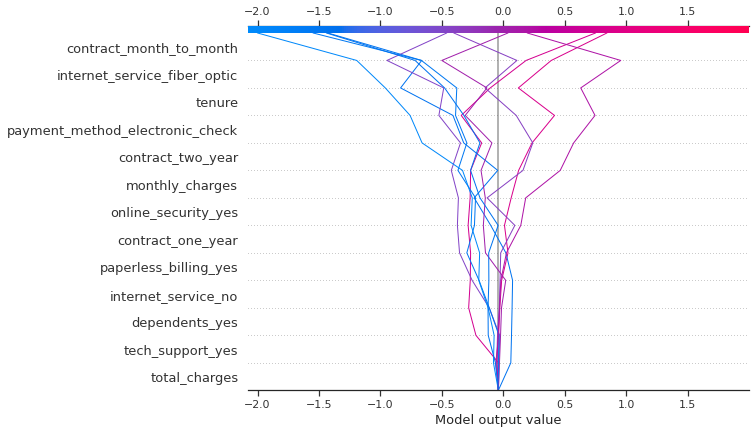

In [ ]:
shap.decision_plot(expected_value[-1], shap_values_multiple[:,:,-1].values[:10], X_test_filter.columns, show=False)

drive = '/content/drive/MyDrive/Digital Skola/Final Project/output/'
fname = 'shap-multiple-decision-plot.svg'
path = drive + fname
plt.savefig(path, format='svg', bbox_inches='tight', facecolor='white')

plt.show()

## 8.7. Waterfall Plot

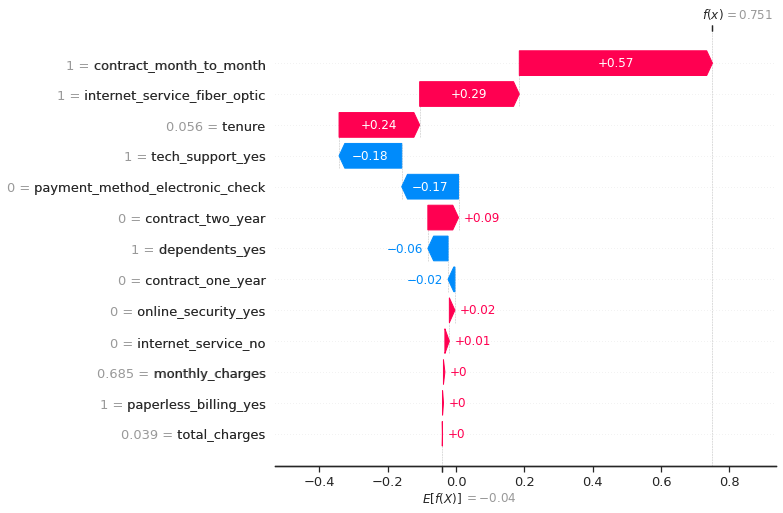

In [ ]:
shap.plots.waterfall(shap_values_single[:,:,-1][0], max_display=20)

## 8.8. Force Plot

### 8.8.1. Single Input

In [ ]:
shap.initjs()

shap.plots.force(expected_value[-1], shap_values_single[:,:,-1].values, input_test.columns)

### 8.8.2. Multiple Input

In [ ]:
shap.initjs()

shap.plots.force(expected_value[-1], shap_values_multiple[:,:,-1].values[:100], X_test_filter.columns)

# 9. Model Deployment

I had deployed my model on a web app using Flask and Heroku. You can try it [here](https://adhang-churn.herokuapp.com/)

# 10. Reference and Further Reading

- Analytics Vidhya. Churn Prediction - Commercial use of Data Science. [link](https://www.analyticsvidhya.com/blog/2021/08/churn-prediction-commercial-use-of-data-science/)
- Avaus. Predicting Customer Churn. [link](https://www.avaus.com/blog/predicting-customer-churn)
- Kaggle. Telco Customer Churn Dataset. [link](https://www.kaggle.com/blastchar/telco-customer-churn)
- IBM. Telco Customer Churn. [link](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)
- Hardvard Business Review. The Value of Keeping the Right Customers. [link](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers)
- OutboundEngine. Customer Retention Marketing vs. Customer Acquisition Marketing. [link](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/)
- Jessica Miles. Read this before you "Drop First". [link](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707)
- Shaked Zychlinski. The Search for Categorical Correlation. [link](https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9)
- Analyse-it. Correlation and association. [link](https://analyse-it.com/docs/user-guide/multivariate/correlation)
- Wikipedia. Correlation does not imply causation. [link](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)
- Wikipedia. Cramer's V. [link](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)
- Jakub Czakon (Neptune Labs). 24 Evaluation Metrics for Binary Classification (And When to Use Them) [link](https://neptune.ai/blog/evaluation-metrics-binary-classification)
- Jakub Czakon (Neptune Labs). F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose? [link](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)
- Scott Lundberg. SHAP Explainable AI. [link](https://github.com/slundberg/shap#citations)
- Scott Lundberg. Be Careful When Interpreting Predictive Models in Search of Causal Insights. [link](https://towardsdatascience.com/be-careful-when-interpreting-predictive-models-in-search-of-causal-insights-e68626e664b6)